In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import cvxopt as co

In [13]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

In [28]:
class Support_Vector_Machine:
    def __init__(self,visualization=True):
        self.visualization=visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    def fit(self,data):
        self.data = data
        #dictionary - ||W||:[w,b]
        opt_dict = {}
        
        transforms = [ #To apply to W vector
            [1,1],
            [-1,1],
            [1,-1],
            [-1,-1]
            ]
        
        all_data = []
        
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        self.max_feature_data = max(all_data)
        self.min_feature_data = min(all_data)
        all_data = None
        step_sizes = [self.max_feature_data*0.1,
                     self.max_feature_data*0.01,
                     self.max_feature_data*0.001]
        #Expensive
        b_range_multiple = 5
        b_multiple = 5
        latest_optimum = self.max_feature_data*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            #Do this because Convex
            optimized = False
            
            while not optimized:
                for b in np.arange(-1*(self.max_feature_data*b_range_multiple),
                                  (self.max_feature_data*b_range_multiple),step=b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        #Weakest link
                        #yi(xi+w*b)
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b)>=1:
                                    found_option= False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)]=[w_t,b]
                            
                if w[0] < 0:
                    optimized = True
                    print("Optimized a step.")
                else:
                    #W = [5,5]
                    #step = 1
                    #W - step == [4,4]
                    w = w - step
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
    
    
    
    def predict(self,features):
        #Sign of the X.W+b
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0],features[1],s=200,marker='*',c=self.colors[classification])        
        return classification
        
    def visualize(self):
        #scattering known featuresets.
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        def hyperplane(x,w,b,v):
            # v = (w.x+b)
            return (-w[0]*x-b+v) / w[1]
        
        datarange=(self.min_feature_data*0.9,self.min_feature_data*1.1)
        hyp_x_min= datarange[0]
        hyp_x_max= datarange[1]
        #pos
                # w.x + b = 1
        # pos sv hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max], [psv1,psv2], "k")
               # w.x + b = -1
        # negative sv hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max], [nsv1,nsv2], "k")

        # w.x + b = 0
        # decision
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max], [db1,db2], "g--")

        plt.show()

<IPython.core.display.Javascript object>


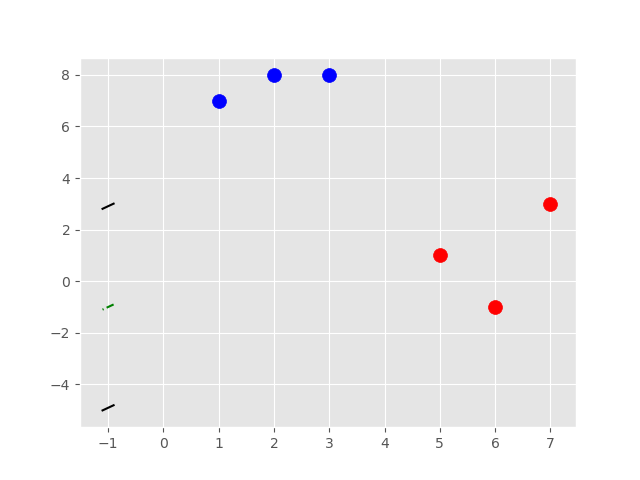

Optimized a step.
Optimized a step.
Optimized a step.


In [29]:
#%matplotlib notebook
svm = Support_Vector_Machine()
svm.fit(data = data_dict)
svm.visualize()